In [28]:
import sys
sys.path.append('../..') # Asegúrate de que Python pueda encontrar el paquete src

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

from src.physics.pulses import GaussianPulse1D, format_value
from src.physics.crystals import KTPCrystal, KTPCrystal_Kato
from src.physics.nonlinear_optics import PhaseMatching
from src.physics.math import conv_discrete

In [29]:
wavelength_1 = 0.795  # (um) | 5.32e-7 # (m)
wavelength_2 = 1.064 # (um) | 1.064e-6 m
ktp_test0 = KTPCrystal()

axis = ['nx', 'ny', 'nz']

# Indice de refraccion de KTP
---

In [30]:
for ax in axis:
    index_ = ktp_test0.refractive_index(wavelength_um=wavelength_1, axis=ax)
    print(f"Refractive index at {wavelength_1} um ({ax}): {index_:.6f}")
    
print("-"*50)
    
for ax in axis:
    index_ = ktp_test0.refractive_index(wavelength_um=wavelength_2, axis=ax)
    print(f"Refractive index at {wavelength_2} um ({ax}): {index_:.6f}")

Refractive index at 0.795 um (nx): 1.750510
Refractive index at 0.795 um (ny): 1.759324
Refractive index at 0.795 um (nz): 1.844375
--------------------------------------------------
Refractive index at 1.064 um (nx): 1.739908
Refractive index at 1.064 um (ny): 1.748024
Refractive index at 1.064 um (nz): 1.829563


# Velocidad de grupo
---

In [31]:
for ax in axis:
    ng = ktp_test0.group_index(wavelength_1, axis=ax)
    print(f"Group index (n_g) at {wavelength_1} um ({ax}): {ng:.6f}")
    
print("-"*50)

for ax in axis:
    vg = ktp_test0.group_velocity(wavelength_1, axis=ax)
    print(f"Group velocity (v_g) at {wavelength_1} um ({ax}): {vg:.2f} m/s")
    
# IMPORTANTE: Para un medio dispersivo se espera que los valores de la velocidad de grupo sean menores que la velocidad de la luz en el vacio.

Group index (n_g) at 0.795 um (nx): 1.795829
Group index (n_g) at 0.795 um (ny): 1.807757
Group index (n_g) at 0.795 um (nz): 1.909063
--------------------------------------------------
Group velocity (v_g) at 0.795 um (nx): 166938156.52 m/s
Group velocity (v_g) at 0.795 um (ny): 165836695.78 m/s
Group velocity (v_g) at 0.795 um (nz): 157036431.46 m/s


In [32]:
for ax in axis:
    ng = ktp_test0.group_index(wavelength_um=wavelength_2, axis=ax)
    print(f"Group index (n_g) at {wavelength_2} um ({ax}): {ng:.6f}")
    
print("-"*50)

for ax in axis:
    vg = ktp_test0.group_velocity(wavelength_um=wavelength_2, axis=ax)
    print(f"Group velocity (v_g) at {wavelength_2} um ({ax}): {vg:.2f} m/s")

Group index (n_g) at 1.064 um (nx): 1.769922
Group index (n_g) at 1.064 um (ny): 1.779928
Group index (n_g) at 1.064 um (nz): 1.870430
--------------------------------------------------
Group velocity (v_g) at 1.064 um (nx): 169381698.54 m/s
Group velocity (v_g) at 1.064 um (ny): 168429577.27 m/s
Group velocity (v_g) at 1.064 um (nz): 160279967.60 m/s


# Phase mismatch
---

In [33]:
ktp_ = KTPCrystal()
pm_ = PhaseMatching(ktp_, lambda_0_um=1.064)

# Frecuencia central del segundo armónico
omega_SHG_0 = 2 * pm_.omega_0

# Calcular Δk para la frecuencia central y una pequeña desviación
omega_values = np.array([omega_SHG_0, omega_SHG_0 + 1e12])  # Ejemplo con desviación de 1 THz
delta_k = pm_.phase_mismatch(omega_values, axis='nz')

print(f"Phase mismatch Δk (m⁻¹): {delta_k}")

Phase mismatch Δk (m⁻¹): [  0.         618.69650207]


In [34]:
omega_values

array([3.54069843e+15, 3.54169843e+15])

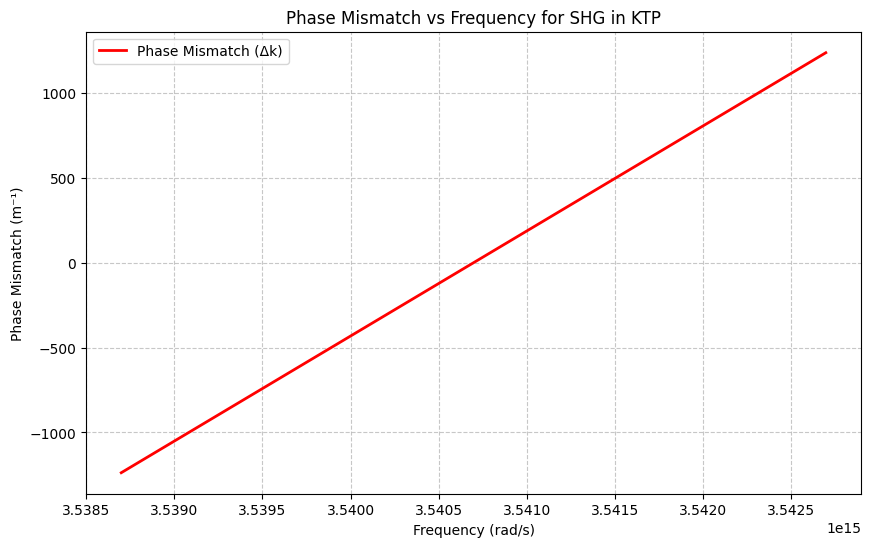

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Asumimos que KTPCrystal y PhaseMatching están definidos
ktp__ = KTPCrystal()
pm__ = PhaseMatching(ktp__, lambda_0_um=1.064)

# Rango de frecuencias alrededor de 2*omega_0
omega_0 = pm__.omega_0
omega_SHG_0 = 2 * omega_0
omega_range = np.arange(omega_SHG_0 - 2e12, omega_SHG_0 + 2e12 + 1e11, 1e11)

# Calcular phase mismatch
delta_k = pm__.phase_mismatch(omega_range, axis='nz')

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(omega_range, delta_k, label='Phase Mismatch (Δk)', color='red', linewidth=2)

# Etiquetas y título
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase Mismatch (m⁻¹)')
plt.title('Phase Mismatch vs Frequency for SHG in KTP')
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar las marcas del eje X para notación científica
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [36]:
# Inicializar el cristal y la clase PhaseMatching
ktp = KTPCrystal()
pm = PhaseMatching(ktp, lambda_0_um=0.795)

# Rango de frecuencias
# omega_range = np.arange(2 * pm.omega_0 - 2e12, 2 * pm.omega_0 + 2e12 + 1e11, 1e4)
omega_range = np.linspace(2 * pm.omega_0 - 2e13, 2 * pm.omega_0 + 2e13, 1000)

# Calcular PMF con y sin QPM
# L = 0.01  # 10 mm en metros
L = 0.01  # 0.4 mm en metros
Lambda_um = 15.5  # Período QPM en micrómetros

pmf_no_qpm = pm.phase_matching_function(omega_range, L, Lambda_um=None)
pmf_with_qpm = pm.phase_matching_function(omega_range, L, Lambda_um=Lambda_um)


In [47]:
omega_range 

array([4.71874608e+15, 4.71878612e+15, 4.71882616e+15, 4.71886620e+15,
       4.71890624e+15, 4.71894628e+15, 4.71898632e+15, 4.71902636e+15,
       4.71906640e+15, 4.71910644e+15, 4.71914648e+15, 4.71918652e+15,
       4.71922656e+15, 4.71926660e+15, 4.71930664e+15, 4.71934668e+15,
       4.71938672e+15, 4.71942676e+15, 4.71946680e+15, 4.71950684e+15,
       4.71954688e+15, 4.71958692e+15, 4.71962696e+15, 4.71966700e+15,
       4.71970704e+15, 4.71974708e+15, 4.71978712e+15, 4.71982716e+15,
       4.71986720e+15, 4.71990724e+15, 4.71994728e+15, 4.71998732e+15,
       4.72002736e+15, 4.72006740e+15, 4.72010744e+15, 4.72014748e+15,
       4.72018752e+15, 4.72022756e+15, 4.72026760e+15, 4.72030764e+15,
       4.72034768e+15, 4.72038772e+15, 4.72042776e+15, 4.72046780e+15,
       4.72050784e+15, 4.72054788e+15, 4.72058792e+15, 4.72062796e+15,
       4.72066800e+15, 4.72070804e+15, 4.72074808e+15, 4.72078812e+15,
       4.72082816e+15, 4.72086820e+15, 4.72090824e+15, 4.72094828e+15,
      

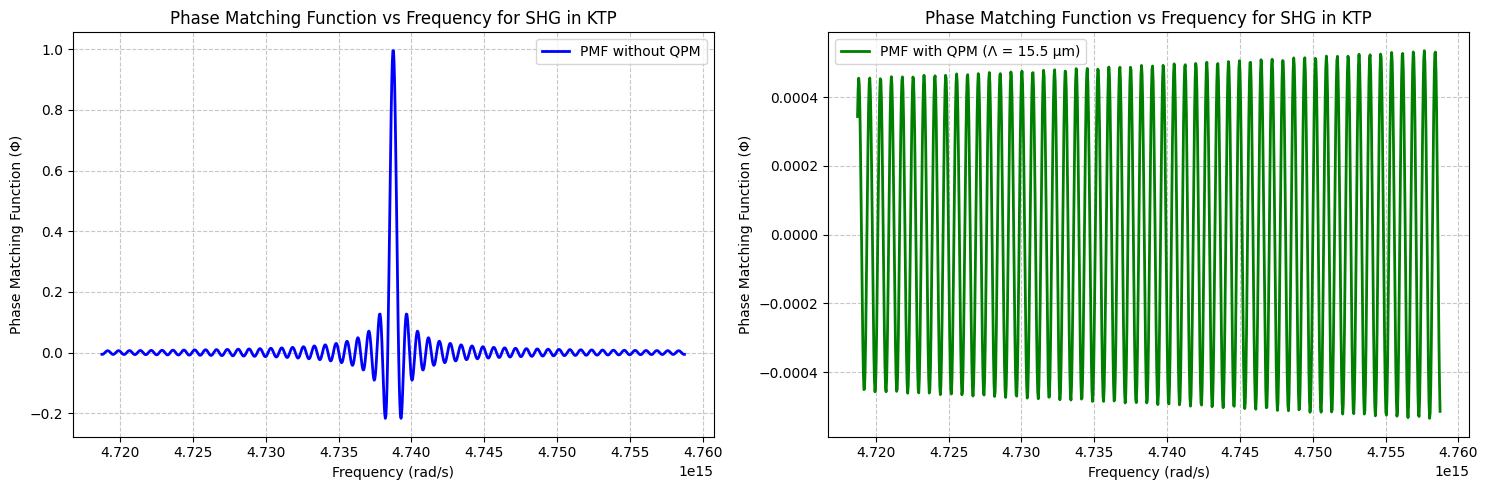

PMF at 2ω_0 (no QPM): 0.9953
PMF at 2ω_0 + 1e12 (no QPM): -0.1090
PMF at 2ω_0 (with QPM): -0.0002
PMF at 2ω_0 + 1e12 (with QPM): 0.0001


In [37]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(omega_range, pmf_no_qpm, label='PMF without QPM', color='blue', linewidth=2)
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase Matching Function (Φ)')
plt.title('Phase Matching Function vs Frequency for SHG in KTP')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(omega_range, pmf_with_qpm, label=f'PMF with QPM (Λ = {Lambda_um} µm)', color='green', linewidth=2)
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase Matching Function (Φ)')
plt.title('Phase Matching Function vs Frequency for SHG in KTP')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir algunos valores para verificación
print(f"PMF at 2ω_0 (no QPM): {pmf_no_qpm[len(pmf_no_qpm)//2]:.4f}")
print(f"PMF at 2ω_0 + 1e12 (no QPM): {pmf_no_qpm[len(pmf_no_qpm)//2 + 10]:.4f}")
print(f"PMF at 2ω_0 (with QPM): {pmf_with_qpm[len(pmf_with_qpm)//2]:.4f}")
print(f"PMF at 2ω_0 + 1e12 (with QPM): {pmf_with_qpm[len(pmf_with_qpm)//2 + 10]:.4f}")

# Second Harmonic Generation
---

In [38]:
# Constantes conocidas


## Convolution

In [39]:
# Definir la función gaussiana
def gaussian(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

In [40]:
# Input gaussian | initial parmeters
central_f = 2.37e+15 
sigma_f = 5.57e+13 

f_range = 8 * sigma_f
frequencies = np.linspace(central_f - f_range, central_f + f_range, 1000)  # frequency's domain

# Compute initial gaussian
a_input= gaussian(frequencies, central_f, sigma_f)

In [41]:
# Discrete convolution
conv_result = conv_discrete(a_input, a_input, frequencies)  # self-convolution
conv_frequencies = frequencies * 2  # la convolulcion dobla la frecuencia central | SHG frequencies

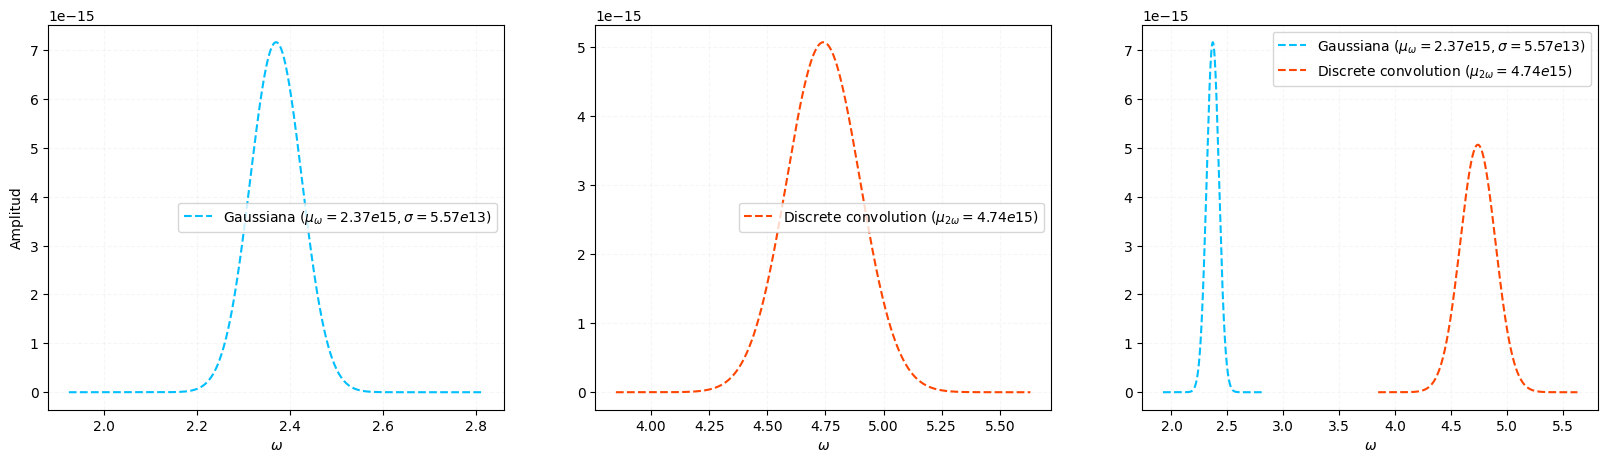

In [42]:
# --- Visualización Comparativa entrada y salida---
fig1, axs = plt.subplots(1,3,figsize=(20,5))

axs[0].plot(frequencies*1e-15, a_input, label=r'Gaussiana ($\mu_{\omega}=2.37e15, \sigma=5.57e13$)', linestyle='--', color='deepskyblue')
axs[0].set_xlabel(r'$\omega$')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.1)
axs[1].plot(conv_frequencies*1e-15, conv_result, label=r'Discrete convolution ($\mu_{2\omega}=4.74e15$)', linestyle='--', color='orangered')
axs[1].set_xlabel(r'$\omega$')
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.1)
axs[2].plot(frequencies*1e-15, a_input, label=r'Gaussiana ($\mu_{\omega}=2.37e15, \sigma=5.57e13$)', linestyle='--', color='deepskyblue')
axs[2].plot(conv_frequencies*1e-15, conv_result, label=r'Discrete convolution ($\mu_{2\omega}=4.74e15$)', linestyle='--', color='orangered')
axs[2].set_xlabel(r'$\omega$')

axs[2].legend()
axs[2].grid(True, linestyle='--', alpha=0.1)

## Product of the convolution and the phase matching function

In [43]:
SHG_shape_with_qpm = conv_result * pmf_with_qpm
SHG_shape_no_qpm =conv_result * pmf_no_qpm

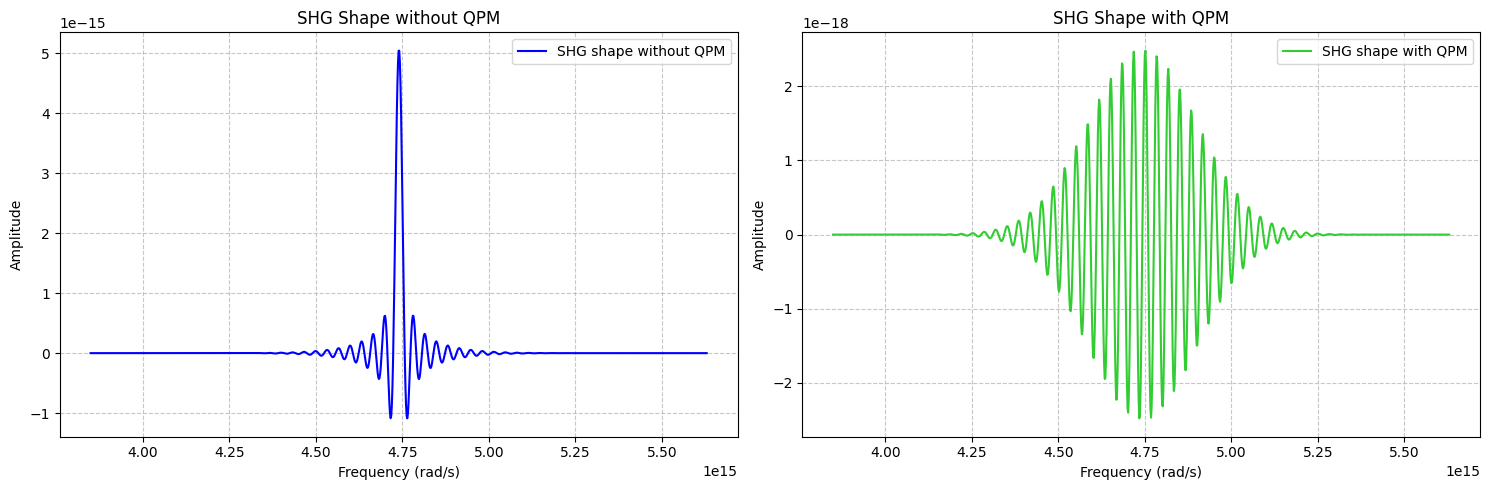

In [44]:
begin = 0
end = -1

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
SHG_frequencies_plot_interval = conv_frequencies[begin: end]
SHG_shape_no_qpm_plot_interval = SHG_shape_no_qpm[begin: end]

plt.plot(SHG_frequencies_plot_interval, SHG_shape_no_qpm_plot_interval, label='SHG shape without QPM', color='blue')
plt.xlabel('Frequency (rad/s)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('SHG Shape without QPM')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()

plt.subplot(1, 2, 2)

SHG_frequencies_plot_interval = conv_frequencies[begin: end]
SHG_shape_with_qpm_plot_interval = SHG_shape_with_qpm[begin: end]

plt.plot(SHG_frequencies_plot_interval, SHG_shape_with_qpm_plot_interval, label='SHG shape with QPM', color='limegreen')
plt.xlabel('Frequency (rad/s)')
plt.title('SHG Shape with QPM')
plt.ylabel('Amplitude')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()

plt.tight_layout()
plt.show()

## Factor de amplitud